In [1]:
# import sklearn
# import ffmpeg
# # import python_speech_features
import IPython.display as ipd
import pandas as pd
from tqdm.notebook import  tqdm
import numpy as np

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# addtrain_path = '../input/keyspotter/KEYSetter/KEYSetter/AdditionalUtterances/latest_keywords/'
# nlpwords_path = '../input/keyspotter/nlp_keywords_29Oct2020/nlp_keywords/'
# img_path = '../input/keyspotter/KEYSetter/KEYSetter/audio_files/'
# train_df_1 = pd.read_csv('../input/keyspotter/KEYSetter/KEYSetter/Train.csv')
ss = pd.read_csv('../input/keyspotter/KEYSetter/KEYSetter/SampleSubmission.csv')

In [4]:
# # Show a sample to listen to
# ipd.Audio(img_path+train_df_1.fn.sample(random_state=42).values[0],rate=1)

In [5]:
# ipd.Audio("../input/keyspotter/KEYSetter/KEYSetter/AdditionalUtterances/latest_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_12df330aafd44d738ddd737e6a4eec36.wav",rate=1)

In [6]:
# !tar -zcvf enna.tar.gz /kaggle/working  
# !tar -czvf interim_files.tar.gz ./files #creatin a tar tile
# The flags represent:

# c – create
# z – using gzip compression
# v – verbal, displaying information about the archive while archiving
# f – using an archive file

In [7]:
# !pip install -q MultiLabel-Transformer
# import sklearn
# import torch
# import  pandas as pd
# import numpy as np
# train_ = pd.read_csv('../input/keyspotterfeatureextractioninterim/files/fmodelling_trainnoaugs.csv')
# train_ = train_.fillna(0)
# test_ =pd.read_csv('../input/keyspotterfeatureextractioninterim/files/fullmodelling_test.csv')
# test_.drop('fn',axis=1,inplace=True)
# test_ = test_.fillna(0)

# ss = pd.read_csv('../input/keyspotter/KEYSetter/KEYSetter/SampleSubmission.csv')

# from MLE_Trans import MLETransformer

# trans = MLETransformer(["label"])

# train_t = trans.fit_transform(train_)

# codes_dict = trans._display(["label"][0])

# X = train_.drop(['label'], axis=1)
# y = train_t.label.astype('category')


# from imblearn.over_sampling import RandomOverSampler

# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# train_ds0,train_ds1 = oversample.fit_resample(X , y)

# train_ds0, train_ds1, test_ = np.array(train_ds0),np.array(train_ds1),np.array(test_)
# print(train_ds0.shape, train_ds1.shape, test_.shape)

# train_ds0 = train_ds0[:,:,np.newaxis]
# test_ = test_[:,:,np.newaxis]
# print(train_ds0.shape, train_ds1.shape, test_.shape)


# train_ds0,train_ds1 = torch.tensor(train_ds0, dtype=torch.float32),torch.tensor(train_ds1, dtype=torch.float32)

# test_ds0 = torch.tensor(test_, dtype=torch.float32 )

# print(train_ds0.shape, train_ds1.shape, test_.shape)


In [8]:
#transfer to torch

from matplotlib import pyplot as plt

import torch
from torch.utils.data import TensorDataset, DataLoader, random_split, Dataset
from torchvision.datasets import ImageFolder
import torchvision.transforms as Trans

from torchvision.utils import make_grid

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as opt
from sklearn.metrics import log_loss

from torchvision import models

In [9]:

# class TestImg_dataset(Dataset):
#     def __init__(self, imgroot, csv_file, transform=None):
#         super().__init__()
#         self.file = csv_file
#         self.root = imgroot
#         self.transform  = transform
        
#     def __len__(self):
#         return len(self.file)

#     def __getitem__(self, idx):
#         row = self.file.loc[idx]
#         imgid_ = row['fn'][12:]
#         img_ = Image.open(os.path.join('{}/{}.png'.format(self.root,imgid_))).convert('RGB')
#         if self.transform != None:
#             img_ = self.transform(img_)
#         return img_
#  test_ds = TestImg_dataset("./files/interim_test" , ss, transform=Trans.ToTensor())   

In [10]:
# transforms = Trans.Compose([
#     #Trans.Grayscale(num_output_channels=1), 
#     Trans.Resize([512,512]),
#     #Trans.RandomAffine(0),
    
#     #Trans.CenterCrop(256),
#     #Trans.RandomCrop(412),
#     #Trans.ColorJitter(brightness = 1),
#     Trans.ToTensor(),
#     #Trans.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
# ])


transforms = {'train':Trans.Compose([
    #Trans.Grayscale(num_output_channels=1), 
    Trans.Resize([512,512]),
    #Trans.RandomCrop(400),
    #Trans.Pad(10),
    Trans.RandomAffine(0),
    
    #Trans.CenterCrop(256),
    #Trans.RandomCrop(412),
    #Trans.ColorJitter(brightness = ),
    Trans.ToTensor(),
    Trans.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    #Trans.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
]),

'test':Trans.Compose([
    #Trans.Grayscale(num_output_channels=1), 
    Trans.Resize([512,512]),
    Trans.ToTensor(),
    Trans.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    
])}

#test_ds = TestImg_dataset("./files/interim_test" , ss, transform=Trans.ToTensor())

new_test_path = "../input/advanced-logmels/files/interim_test"
new_train_path = "../input/advanced-logmels/files/interim_train"
train_ds = ImageFolder(new_train_path , transform= transforms['train'])
test_ds = ImageFolder(new_test_path  , transform= transforms['test'])

# train_ds =TensorDataset(train_ds0,train_ds1)

# test_ds = TensorDataset(test_ds0)

In [11]:
im_,label_ = train_ds[0]
print(im_.shape , label_ )
im_

torch.Size([3, 512, 512]) 0


tensor([[[-1.1075, -1.1075, -1.1075,  ..., -1.1075, -1.1075, -1.1075],
         [-1.1075, -1.1075, -1.1075,  ..., -1.1075, -1.1075, -1.1075],
         [-1.1075, -1.1075, -1.1075,  ..., -1.1075, -1.1075, -1.1075],
         ...,
         [-1.0048, -1.0219, -1.0562,  ..., -1.1075, -1.1075, -1.1075],
         [-0.9534, -0.9705, -1.0219,  ..., -1.1075, -1.1075, -1.1075],
         [-0.9363, -0.9534, -1.0219,  ..., -1.1075, -1.1075, -1.1075]],

        [[-0.7052, -0.7052, -0.7052,  ..., -0.7052, -0.7052, -0.7052],
         [-0.7052, -0.7052, -0.7052,  ..., -0.7052, -0.7052, -0.7052],
         [-0.7052, -0.7052, -0.7052,  ..., -0.7052, -0.7052, -0.7052],
         ...,
         [-0.5476, -0.5651, -0.6176,  ..., -0.7052, -0.7052, -0.7052],
         [-0.4426, -0.4601, -0.5651,  ..., -0.7052, -0.7052, -0.7052],
         [-0.4251, -0.4426, -0.5476,  ..., -0.7052, -0.7052, -0.7052]],

        [[ 1.5420,  1.5420,  1.5420,  ...,  1.5420,  1.5420,  1.5420],
         [ 1.5420,  1.5420,  1.5420,  ...,  1

In [12]:
#print first 10 classes out of 193
classeslist = train_ds.classes

print(train_ds.classes[:10])

['Pump', 'Spinach', 'abalimi', 'afukirira', 'agriculture', 'akammwanyi', 'akamonde', 'akasaanyi', 'akatunda', 'akatungulu']


In [13]:
#512*512*3

def show_sample(im_, label_):
    print('Label: {} {}'.format(train_ds.classes[label_], label_))
    plt.imshow(im_.permute((1, 2, 0)))        

Label: Pump 0


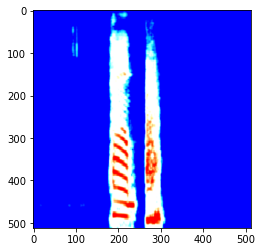

In [14]:
show_sample(*train_ds[0])

Label: abalimi 2


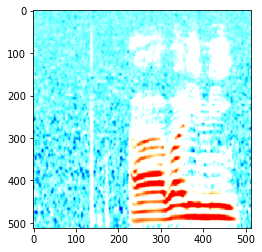

In [15]:
show_sample(*train_ds[101])

Label: akatungulu 9


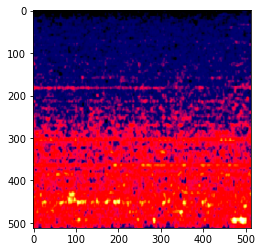

In [16]:
show_sample(*train_ds[1000])

Label: bibala 18


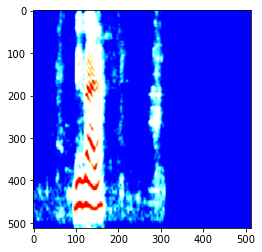

In [17]:
show_sample(*train_ds[2000])

Label: ebinyebwa 42


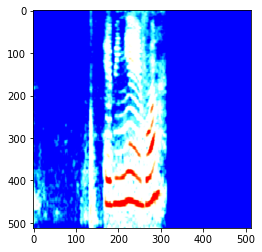

In [18]:
show_sample(*train_ds[4000])

In [19]:
len(train_ds)

18836

In [20]:
random_seed = 42
torch.manual_seed(random_seed);

val_size = 709*4
train_size = len(train_ds) - val_size 
train_ds_s , val_ds = random_split(train_ds , [train_size, val_size])
print((len(train_ds_s) , len(val_ds)))

(16000, 2836)


In [21]:
#set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed);
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

batch_size = 50 

train_dl = DataLoader(train_ds_s,batch_size ,  shuffle=True  )
val_dl   = DataLoader(val_ds  , batch_size , shuffle=False  )
test_dl  = DataLoader(test_ds , shuffle=False)

In [22]:
random_seed = 42
torch.manual_seed(random_seed);

def show_batch(dl_):
    #display batch of images using make_grid
    for img_b,lab_b in dl_:
        print('images shapes:',img_b.shape)
        print('images ndim:',img_b.ndim)
        print('labels shapes:',lab_b.shape)
        plt.figure(figsize=(16,8))
        plt.axis('off')
        #plt.imshow(np.transpose(make_grid(img_b , nrow=20),(1,2,0)))
        plt.imshow(make_grid(img_b, nrow=17).permute((1, 2, 0)))
        break

images shapes: torch.Size([50, 3, 512, 512])
images ndim: 4
labels shapes: torch.Size([50])


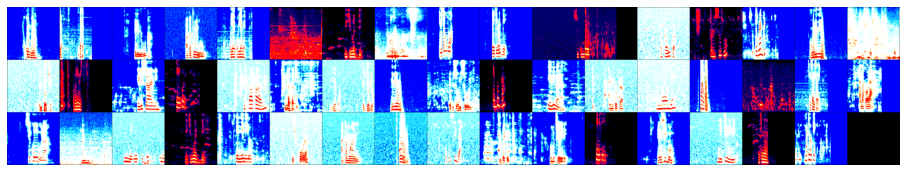

In [23]:
random_seed = 42
torch.manual_seed(random_seed);

show_batch(train_dl)

In [24]:
#check if GPU is present
torch.cuda.is_available()

True

In [25]:
#set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed);
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [26]:
def acc_score(outs_ ,labels_):
    # evaluate model
    maxprobs , preds_ = torch.max(torch.softmax(outs_,1), dim=1)
    return torch.tensor(torch.sum(preds_ == labels_.type(torch.int64)).item() / len(preds_))
    
    maxprobs , preds_ = torch.max(torch.softmax(outs_,1), dim=1)
    return torch.tensor(torch.sum(preds_ == labels_).item() / len(preds_))

# def evaluate_model(model, dl):
    
#     model.eval()
#     return model.val_epoch_end([model.validation_steps(batch_) for batch_ in dl])

In [27]:
random_seed = 42
torch.manual_seed(random_seed);

#class imgfeed_network(nn.Module):
class AudioClassificationBase(nn.Module):
    def training_step(self, batch):
        images, targets = batch 
        out = self(images)                      
        loss = F.cross_entropy(out, targets)      
        return loss
    
    def validation_step(self, batch):
        images, targets = batch 
        out = self(images)                           # Generate predictions
        loss = F.cross_entropy(out, targets)  # Calculate loss
        score = acc_score(out, targets)
        return {'val_loss': loss.detach(), 'val_score': score.detach() }
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_scores = [x['val_score'] for x in outputs]
        epoch_score = torch.stack(batch_scores).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_score': epoch_score.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_score: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_score']))
        
# class AudioCnnModel(AudioClassificationBase):
#     def __init__(self):
#         super().__init__()
#         self.network = nn.Sequential(
#             nn.Conv2d(3, 32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),

#             nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),
#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),

#             nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),
#             nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.AdaptiveAvgPool2d(1),

#             nn.Flatten(), 
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, 193),
#             nn.Sigmoid()
#         )
        
#     def forward(self, xb):
#         return self.network(xb)
    
class AudioCnnModel2(AudioClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features#*512#self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 193)

    
    def forward(self, xb):
        return self.network(xb)
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

In [28]:
def get_default_device():
    '''helper function to help in reproducibility 
    to return cuda device if true and cpu if false'''
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

device(type='cuda')

In [29]:
def to_device(data, device):
    '''Helper function to move data, model,
    or any tensor excluding dataloaders to device(cpu/cuda)'''
    if isinstance(data,(list , tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device , non_blocking=True)

In [30]:
random_seed = 42
torch.manual_seed(random_seed);

#how to supply data from data loaders to cuda 
for _img, _lab in train_dl:
    print(_img.shape)
    _img = to_device(_img , device)
    print(_img)
    #checking type of device on which data is on 
    print(_img.device)
    break

torch.Size([50, 3, 512, 512])
tensor([[[[-1.1075, -1.1075, -1.1075,  ..., -1.1075, -1.1075, -1.1075],
          [-1.1075, -1.1075, -1.1075,  ..., -1.1075, -1.1075, -1.1075],
          [-1.1075, -1.1075, -1.1075,  ..., -1.1075, -1.1075, -1.1075],
          ...,
          [-0.9020, -0.9020, -0.9363,  ..., -1.1075, -1.1075, -1.1075],
          [-0.9192, -0.9363, -0.9877,  ..., -1.1075, -1.1075, -1.1075],
          [-0.9192, -0.9363, -1.0048,  ..., -1.1075, -1.1075, -1.1075]],

         [[-0.7052, -0.7052, -0.7052,  ..., -0.7052, -0.7052, -0.7052],
          [-0.7052, -0.7052, -0.7052,  ..., -0.7052, -0.7052, -0.7052],
          [-0.7052, -0.7052, -0.7052,  ..., -0.7052, -0.7052, -0.7052],
          ...,
          [-0.3725, -0.3725, -0.4426,  ..., -0.7052, -0.6877, -0.6877],
          [-0.3901, -0.4076, -0.5126,  ..., -0.7052, -0.7052, -0.7052],
          [-0.3901, -0.4076, -0.5301,  ..., -0.7052, -0.7052, -0.7052]],

         [[ 1.5420,  1.5420,  1.5420,  ...,  1.5420,  1.5420,  1.5420],


In [31]:
class DeviceDataLoader():
    '''wrap a dataloader to move to device'''
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        '''Yield a batch of data after moving to device'''
        for batch in self.dl:
            yield to_device(batch, self.device)
            
    def __len__(self):
        '''Number of batches'''
        return len(self.dl)

In [32]:
#set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed);

#send dl to available device (cpu or cuda) using DeviceDataLoader class
train_dl = DeviceDataLoader(train_dl, device)
val_dl   = DeviceDataLoader(val_dl, device)

test_dl  = DeviceDataLoader(test_dl, device)

In [33]:
import os
models_path  = "./files/models/"
os.makedirs(models_path)


def save_load_model(mod, modelpath , model_name ,save = False , load=False):
    #saves a model
    if save == True:
        return torch.save(mod.state_dict(), '{}{}.pth'.format(modelpath,model_name))
    
    #loads a model
    elif load == True:
        return mod.load_state_dict(torch.load('{}{}.pth'.format(modelpath,model_name))  )

In [34]:
#for imaefolder submission loop

def predict_images(test_ds, model , proba='Sigmoid'):
    if proba == 'Softmax':
        predictio = []
        for imj_,label_ in test_ds:
            # Convert to a batch of 1
            xb = to_device(imj_.unsqueeze(0), device)
            # Get predictions from model
            yb = model(xb)
            #  probabilities
            probs = torch.softmax(yb, dim=1)
                        
            predictio.append(probs.detach().cpu().numpy())
        return predictio
    
    else:
        predictio = []
        for imj_,label_ in test_ds:
            # Convert to a batch of 1
            xb = to_device(imj_.unsqueeze(0), device)
            # Get predictions from model
            yb = model(xb)
            #  probabilities
            probs = torch.sigmoid(yb)#, dim=1)
            predictio.append(probs.detach().cpu().numpy())
        return predictio

    # Pick index with highest probability
    #_, preds  = torch.max(yb, dim=1)
    
    # Retrieve the class label
    #return dataset.classes[preds[0].item()]
    


In [35]:
os.makedirs('./files/submissions')

In [36]:
#set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed);

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        valid_loss_min = 0.042
        model_file_name = 'best_model.pth'
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            lrs.append(get_lr(optimizer))
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        
        valid_loss = result['val_loss']
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), './files/models/{}{}'.format(valid_loss,model_file_name))
            valid_loss_min = valid_loss
            print ('curent  best model val loss {}'.format(valid_loss))

#             preds = predict_images(test_ds, model , proba='Sigmoid')
#             test_preds = torch.from_numpy(np.array(preds))
#             for i, label in enumerate(train_ds.classes):
#                 ss[label] = [t[0][i].item() for t in test_preds]
#             ss.to_csv('./files/submissions/{}Submit1{}.csv'.format(valid_loss,epoch) ,index=False )
            
         
            preds = predict_images(test_ds, model , proba='Softmax')
            test_preds = torch.from_numpy(np.array(preds))
            for i, label in enumerate(train_ds.classes):
                ss[label] = [t[0][i].item() for t in test_preds]
            ss.to_csv('./files/submissions/{}Submit2{}.csv'.format(valid_loss,epoch) ,index=False )
            
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [37]:
#set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed);
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

#instantiate model 
model08_1 = AudioCnnModel2()

model08_1

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


AudioCnnModel2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [38]:
# #save 1st baseline model before trainin

save_load_model(model08_1, models_path , 'pretrainin_torc_model08_1' ,save = True , load=False)

In [39]:
#set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed);
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

#move instantiated model to current available device using to_device
model08_1 = to_device(model08_1 , device)
model08_1

AudioCnnModel2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [40]:
#set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed);



def try_batch(model , dl):
    for images, labels in dl:
        print('images.shape:', images.shape)
        print('images.size:', images.size()) 
        out = model(images)
        print('out.shape:', out.shape)
        print('out[0]:', out[0])
        break

try_batch(model08_1 , train_dl)

images.shape: torch.Size([50, 3, 512, 512])
images.size: torch.Size([50, 3, 512, 512])
out.shape: torch.Size([50, 193])
out[0]: tensor([ 0.2459,  1.7237, -0.3068, -0.1707,  0.1375, -0.2808,  0.3028,  0.7634,
         0.1292, -0.2893,  0.3892, -0.1441,  1.0513, -0.8299, -0.0583,  0.4401,
        -0.1505,  0.1799, -0.1697,  0.2448, -0.5786,  0.1377,  0.7892, -1.1193,
         0.7802,  0.3705, -0.0706, -0.4197,  0.2107,  0.0915,  0.9264,  0.2924,
         0.0348,  0.2923, -0.2810, -0.0782,  0.3827, -1.0098, -0.3514, -0.1816,
        -0.6212,  0.0814, -0.0178, -0.1159,  0.9044, -0.4706, -0.6671,  0.2910,
        -0.5045, -1.0581, -0.7268,  0.9153,  1.3414,  0.1220, -0.5058,  0.9267,
        -0.1620, -0.7152,  0.7591,  0.1137,  0.9149,  0.4163, -0.2169,  0.4543,
         0.5786, -0.1675, -0.2823,  0.1776,  0.6197,  0.8711, -0.1037, -0.5161,
        -1.6299, -0.5495, -0.1881, -0.2005,  0.4156, -0.2977,  1.1443, -0.0088,
        -0.4895, -0.8816, -1.1003,  0.0247,  0.1252,  0.3317,  0.1045,  

In [41]:
#set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed);

history_metrics = [evaluate(model08_1, val_dl)]
history_metrics

[{'val_loss': 5.409308433532715, 'val_score': 0.0010526315309107304}]

In [42]:
# #save 1st baseline model before trainin

save_load_model(model08_1, models_path , 'pretrainin_torc_model08_1' ,save =False  , load=True)

<All keys matched successfully>

In [43]:
#First, freeze the ResNet layers and train some epochs. This only trains the final layer to start classifying the images.

model08_1.freeze()

In [44]:
#set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed);
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

history_metrics += fit(51, 0.0002 , model08_1, train_dl, val_dl, opt_func= opt.AdamW)


Epoch [0], train_loss: 3.0765, val_loss: 1.4049, val_score: 0.6969



Epoch [1], train_loss: 0.9514, val_loss: 0.7251, val_score: 0.8268



Epoch [2], train_loss: 0.4500, val_loss: 0.5728, val_score: 0.8555



Epoch [3], train_loss: 0.2268, val_loss: 0.3085, val_score: 0.9210



Epoch [4], train_loss: 0.1145, val_loss: 0.3151, val_score: 0.9260



Epoch [5], train_loss: 0.0958, val_loss: 0.2689, val_score: 0.9315



Epoch [6], train_loss: 0.0692, val_loss: 0.2376, val_score: 0.9373



Epoch [7], train_loss: 0.0658, val_loss: 0.2601, val_score: 0.9348



Epoch [8], train_loss: 0.0575, val_loss: 0.3037, val_score: 0.9198



Epoch [9], train_loss: 0.0654, val_loss: 0.2229, val_score: 0.9471



Epoch [10], train_loss: 0.0372, val_loss: 0.1692, val_score: 0.9564



Epoch [11], train_loss: 0.0569, val_loss: 0.2185, val_score: 0.9399



Epoch [12], train_loss: 0.0504, val_loss: 0.1981, val_score: 0.9445



Epoch [13], train_loss: 0.0531, val_loss: 0.1866, val_score: 0.9431



Epoch [14], train_loss: 0.0372, val_loss: 0.1765, val_score: 0.9491



Epoch [15], train_loss: 0.0427, val_loss: 0.1557, val_score: 0.9587



Epoch [16], train_loss: 0.0183, val_loss: 0.1035, val_score: 0.9717



Epoch [17], train_loss: 0.0170, val_loss: 0.9797, val_score: 0.7779



Epoch [18], train_loss: 0.0667, val_loss: 0.2155, val_score: 0.9368



Epoch [19], train_loss: 0.0367, val_loss: 0.0993, val_score: 0.9702



Epoch [20], train_loss: 0.0055, val_loss: 0.0661, val_score: 0.9842



Epoch [21], train_loss: 0.0009, val_loss: 0.0484, val_score: 0.9881



Epoch [22], train_loss: 0.0004, val_loss: 0.0457, val_score: 0.9874



Epoch [23], train_loss: 0.0003, val_loss: 0.0441, val_score: 0.9881



Epoch [24], train_loss: 0.0002, val_loss: 0.0443, val_score: 0.9870



Epoch [25], train_loss: 0.0002, val_loss: 0.0421, val_score: 0.9884



Epoch [26], train_loss: 0.0002, val_loss: 0.0424, val_score: 0.9874



curent  best model val loss 0.04156285151839256
Epoch [27], train_loss: 0.0001, val_loss: 0.0416, val_score: 0.9884



Epoch [28], train_loss: 0.0001, val_loss: 0.0420, val_score: 0.9874



curent  best model val loss 0.03968781605362892
Epoch [29], train_loss: 0.0001, val_loss: 0.0397, val_score: 0.9884



curent  best model val loss 0.040105924010276794
Epoch [30], train_loss: 0.0001, val_loss: 0.0401, val_score: 0.9898



curent  best model val loss 0.04010036587715149
Epoch [31], train_loss: 0.0001, val_loss: 0.0401, val_score: 0.9884



Epoch [32], train_loss: 0.0001, val_loss: 0.0452, val_score: 0.9888



curent  best model val loss 0.04002916067838669
Epoch [33], train_loss: 0.0001, val_loss: 0.0400, val_score: 0.9891



curent  best model val loss 0.03923917934298515
Epoch [34], train_loss: 0.0001, val_loss: 0.0392, val_score: 0.9902



curent  best model val loss 0.03955657035112381
Epoch [35], train_loss: 0.0001, val_loss: 0.0396, val_score: 0.9898



curent  best model val loss 0.0394756905734539
Epoch [36], train_loss: 0.0000, val_loss: 0.0395, val_score: 0.9891



curent  best model val loss 0.03965643048286438
Epoch [37], train_loss: 0.0000, val_loss: 0.0397, val_score: 0.9891



curent  best model val loss 0.03968978300690651
Epoch [38], train_loss: 0.0000, val_loss: 0.0397, val_score: 0.9895



curent  best model val loss 0.0402500182390213
Epoch [39], train_loss: 0.0000, val_loss: 0.0403, val_score: 0.9895



curent  best model val loss 0.03958398476243019
Epoch [40], train_loss: 0.0000, val_loss: 0.0396, val_score: 0.9891



curent  best model val loss 0.039259884506464005
Epoch [41], train_loss: 0.0000, val_loss: 0.0393, val_score: 0.9895



curent  best model val loss 0.038326118141412735
Epoch [42], train_loss: 0.0000, val_loss: 0.0383, val_score: 0.9905



curent  best model val loss 0.03941655904054642
Epoch [43], train_loss: 0.0000, val_loss: 0.0394, val_score: 0.9898



curent  best model val loss 0.040448736399412155
Epoch [44], train_loss: 0.0000, val_loss: 0.0404, val_score: 0.9891



curent  best model val loss 0.03992389142513275
Epoch [45], train_loss: 0.0000, val_loss: 0.0399, val_score: 0.9905



Epoch [46], train_loss: 0.0000, val_loss: 0.0420, val_score: 0.9898



curent  best model val loss 0.041480652987957
Epoch [47], train_loss: 0.0000, val_loss: 0.0415, val_score: 0.9902



curent  best model val loss 0.04097028449177742
Epoch [48], train_loss: 0.0000, val_loss: 0.0410, val_score: 0.9895



curent  best model val loss 0.03819727525115013
Epoch [49], train_loss: 0.0000, val_loss: 0.0382, val_score: 0.9905



curent  best model val loss 0.04022523760795593
Epoch [50], train_loss: 0.0000, val_loss: 0.0402, val_score: 0.9898


In [45]:
#save 2nd baseline model after 1st trainin

save_load_model(model08_1, models_path , '1trained_torc_model08_1' ,save = True , load=False)

In [46]:
# preds = predict_images(test_ds, model08_1 , proba='Sigmoid')
# test_preds = torch.from_numpy(np.array(preds))
# for i, label in enumerate(train_ds.classes):
#     ss[label] = [t[0][i].item() for t in test_preds]
# ss.to_csv('./files/submissions/torc_trainedsubmission01_1.csv' ,index=False )        
         
preds = predict_images(test_ds, model08_1 , proba='Softmax')
test_preds = torch.from_numpy(np.array(preds))
for i, label in enumerate(train_ds.classes):
    ss[label] = [t[0][i].item() for t in test_preds]
ss.to_csv('./files/submissions/torc_trainedsubmission01_2.csv' ,index=False )

In [47]:
#best ensemble-trial2.csv 
df1 = pd.read_csv('./files/submissions/0.03819727525115013Submit249.csv')
df2 = pd.read_csv('./files/submissions/0.041480652987957Submit247.csv')
df3 = pd.read_csv('./files/submissions/0.03992389142513275Submit245.csv')
df4 = pd.read_csv('./files/submissions/0.03923917934298515Submit234.csv')
df5 = pd.read_csv('./files/submissions/0.038326118141412735Submit242.csv')
df6 = pd.read_csv('./files/submissions/0.03955657035112381Submit235.csv')
df7 = pd.read_csv('./files/submissions/0.0394756905734539Submit236.csv')
df8 = pd.read_csv('./files/submissions/0.04022523760795593Submit250.csv')

df9 = df1
df9.loc[:,'maize streak virus':'obutungulu'] = df1.loc[:,'maize streak virus':'obutungulu']+df2.loc[:,'maize streak virus':'obutungulu']+df3.loc[:,'maize streak virus':'obutungulu']+df4.loc[:,'maize streak virus':'obutungulu']+df5.loc[:,'maize streak virus':'obutungulu']+df6.loc[:,'maize streak virus':'obutungulu']+df7.loc[:,'maize streak virus':'obutungulu']+df8.loc[:,'maize streak virus':'obutungulu']
df9.to_csv('./files/submissions/ensembleadv03-trial2.csv' , index=False)

In [48]:
# #Now, unfreeze and train some more.
# model08_1.unfreeze()

In [49]:
# #set random seed for reproducibility
# random_seed = 42
# np.random.seed(random_seed)
# torch.manual_seed(random_seed);
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

# history_metrics += fit(3, 0.0002 , model08_1, train_dl, val_dl, opt_func= opt.AdamW)

# # #save 1st baseline model after 2nd trainin
# save_load_model(model08_1, models_path , '3trained_torc_model08' ,save = True , load=False)

# preds = predict_images(test_ds, model08_1 , proba='Sigmoid')
# test_preds = torch.from_numpy(np.array(preds))
# for i, label in enumerate(train_ds.classes):
#     ss[label] = [t[0][i].item() for t in test_preds]
# ss.to_csv('./files/submissions/torc_trainedsubmission03_1.csv' ,index=False )            
         
# preds = predict_images(test_ds, model08_1 , proba='Softmax')
# test_preds = torch.from_numpy(np.array(preds))
# for i, label in enumerate(train_ds.classes):
#     ss[label] = [t[0][i].item() for t in test_preds]
# ss.to_csv('./files/submissions/torc_trainedsubmission03_2.csv' ,index=False )

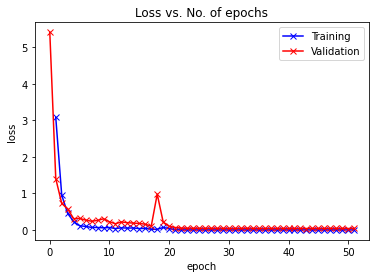

In [50]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
plot_losses(history_metrics)

Text(0.5, 1.0, 'loss per epoch')

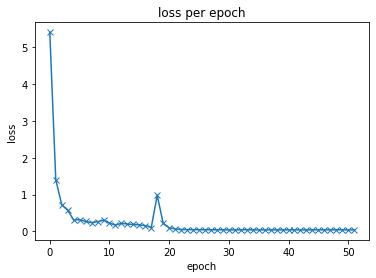

In [51]:
#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#list of losses
train_losses = [x.get('train_loss') for x in history_metrics]
losses = [x['val_loss'] for x in history_metrics]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss per epoch')

In [52]:
# train_lrs = [x.get('lrs') for x in history_metrics]
# plt.plot(train_lrs, '-x')
# plt.xlabel('epoch')
# plt.ylabel('train_lrs')
# plt.title('train_lrs per epoch')

Text(0.5, 1.0, 'loss per epoch')

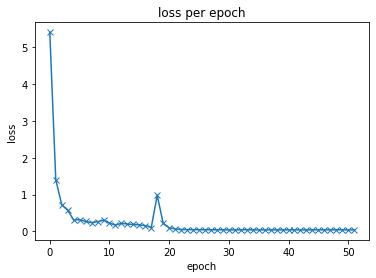

In [53]:
#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#list of losses
#train_losses = [x.get('train_loss') for x in history_metrics]
losses = [x['val_loss'] for x in history_metrics]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss per epoch')

Text(0.5, 1.0, 'acc per epoch')

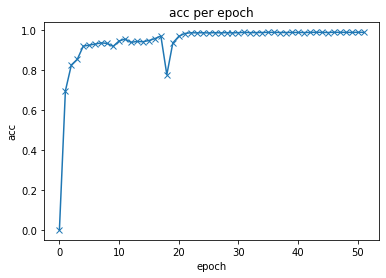

In [54]:
#list of accs
accs = [x['val_score'] for x in history_metrics]
plt.plot(accs, '-x')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('acc per epoch')

In [55]:
#codes from wjeat rowt
def single_preds(outs_):
    # evaluate model
    outs_ = torch.softmax(outs_, 1)
    maxprobs , preds_ = torch.max(outs_, dim=1)
    return preds_

In [56]:
def predict_single(image):
    xb = image.unsqueeze(0)
    xb = to_device(xb, device)
    preds = model08_1(xb)
    prediction = preds[0]
    _,p = torch.max(prediction , dim=-1)
    print("Prediction: ",train_ds.classes[p.item()],p.item())
for i , v in train_ds:
    predict_single(i)
    print('True:',train_ds.classes[v] , v)
    #show_samples(i, v)
    break

Prediction:  Pump 0
True: Pump 0


In [57]:
for xx,xy in val_dl:
    yat = model08_1(xx)
    print('loss:',F.cross_entropy(yat,xy))
    break

loss: tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward>)


In [58]:
!tar -zcvf output_files.tar.gz ./files #creatin a tar file

./files/
./files/submissions/
./files/submissions/0.039259884506464005Submit241.csv
./files/submissions/0.03968781605362892Submit229.csv
./files/submissions/0.03923917934298515Submit234.csv
./files/submissions/0.0402500182390213Submit239.csv
./files/submissions/0.03819727525115013Submit249.csv
./files/submissions/0.04010036587715149Submit231.csv
./files/submissions/0.03958398476243019Submit240.csv
./files/submissions/0.038326118141412735Submit242.csv
./files/submissions/0.0394756905734539Submit236.csv
./files/submissions/0.04156285151839256Submit227.csv
./files/submissions/0.03965643048286438Submit237.csv
./files/submissions/0.040448736399412155Submit244.csv
./files/submissions/torc_trainedsubmission01_2.csv
./files/submissions/0.040105924010276794Submit230.csv
./files/submissions/0.03941655904054642Submit243.csv
./files/submissions/0.03968978300690651Submit238.csv
./files/submissions/0.041480652987957Submit247.csv
./files/submissions/0.03955657035112381Submit235.csv
./files/submission